<a href="https://colab.research.google.com/github/TheRealTN/Linear-Regression-Housing/blob/main/Linear_Regression_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Linear Regression Model for Houses

First, gather tools needed for building this model

1.   Import libraries: scikit-learn, Numpy, pandas
2.   Import housing dataset using pandas



In [901]:
from sklearn import linear_model
import numpy as np
import pandas as pd

In [902]:
# Load in and read our dataset (csv file)
HouseData = pd.read_csv('https://raw.githubusercontent.com/TheRealTN/Linear-Regression-Housing/refs/heads/main/housing_dataset.csv')
HouseData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [903]:
HouseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


*Looking at the Non-Null Count, we see that one number (total_bedrooms) doesn't match the rest, meaning we have some Null values in our dataset. Therefore, we need to get rid of those data points.*

---



In [904]:
# Drop rows with NaN Values
HouseData.dropna(inplace=True)
HouseData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [905]:
# Check number of rows and columns
HouseData.shape

(20433, 10)

In [906]:
# Remove redundant data columns: longitude and latitude

HouseData.drop(['longitude', 'latitude'], axis=1, inplace=True)
HouseData.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Ocean_Proximity is the only data column that contains non-numerical values: "Island, Inland, Near Ocean, Near Bay, and <1H Ocean". For linear regression, all data values must be numerical, thus we assign each string value a number.

In [907]:
# Rewrite ocean_proximity data
ocean_proximity_mapping = {
    'ISLAND': 1,
    'INLAND': 2,
    'NEAR OCEAN': 3,
    'NEAR BAY': 4,
    '<1H OCEAN': 5
}

HouseData['ocean_proximity_encoded'] = HouseData['ocean_proximity'].map(ocean_proximity_mapping)

# Drop the original 'ocean_proximity' column
HouseData.drop('ocean_proximity', axis=1, inplace=True)

HouseData.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4


With our dataset and packages loaded in, lets set up our model creation.

Our objective is to use the features (total_rooms, total_bedrooms, etc.) to predict our target (median_house_value).

*   "If a house with 2 bedrooms and 2 bathrooms is 200,000 dollars..."
*   "If a house with 3 bedrooms and 3 bathrooms is 500,000 dollars..."
*   "How much is a house with 2 bedrooms and 3 bathrooms?"
*   "Or how about a house with 5 bedroom and 6 bathrooms?"


We will build a linear regression model to predict these values.



---


First, lets divide the dataset into "X" and Y".

X will contain all feature data points (bedrooms, population, etc.). **Independent Variables**

Y will contain our target values that we are trying to predict (house values). **Dependent Variable**






In [908]:
X = HouseData.drop('median_house_value', axis=1)   # X variable will contain the all features data
Y = HouseData['median_house_value']                # Y variable will contain the target data (the house value)

In [909]:
X.shape, Y.shape

((20433, 7), (20433,))

Now we split our X and Y data again into training and testing data.

Training data (as "X_train" and "Y_train") will be used to build the model.\
Testing data (as "X_test" and "Y_test") will test accuracy of the model afterwards.



In [910]:
from sklearn.model_selection import train_test_split  # Package for spliting training/testing data
from sklearn.preprocessing import StandardScaler      # Standardize data points due to mixture of low and extreme values

In [911]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)  # Split dataset into training and testing data

In [912]:
X_train.shape, Y_train.shape # Check rows and columns of training data

((16346, 7), (16346,))

In [913]:
X_test.shape, Y_test.shape # Check rows and columns of testing data

((4087, 7), (4087,))

### Standardizing Dataset

Looking at our data, we see values that are larger compared to others:
*   Age: 20-60
*   Population: 300-6000
*   Home Value: 100000-800000

Because of this, features with large scales (e.g. house cost = 1,000,000) can dominate features with small scales (e.g. age = 30).

Thus, we standardize our dataset.
**Standardizing** makes all features contribute equally to the model.





In [914]:
# Load package for standardizing data
from sklearn.preprocessing import StandardScaler

# Standardize all feature (X) data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [916]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [917]:
model = linear_model.LinearRegression(positive=True)

In [918]:
model.fit(X_train_scaled, Y_train)

LinearRegression(positive=True)

In [919]:
Y_pred = model.predict(X_test_scaled)

In [920]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [21300.74340807     0.         13341.38850402     0.
     0.         75997.43007021 25056.21101974]
Intercept: 206368.31328765448
Mean squared error (MSE): 5802712566.36
Coefficient of determination (R^2): 0.57



*   Coefficient tells us **total_rooms**, **population**, and **household** has no predictive value (*since Coefficient value is 0 for those features*)
*   Coefficent of determination (R^2) shows how much variance is explained in our model:
    1.   If R^2 is = 1, our model prediction is 100% accurate
    2.   If R^2 is = 0, our model cannot explain any variance; completely inaccurate





In [921]:
import matplotlib.pyplot as plt

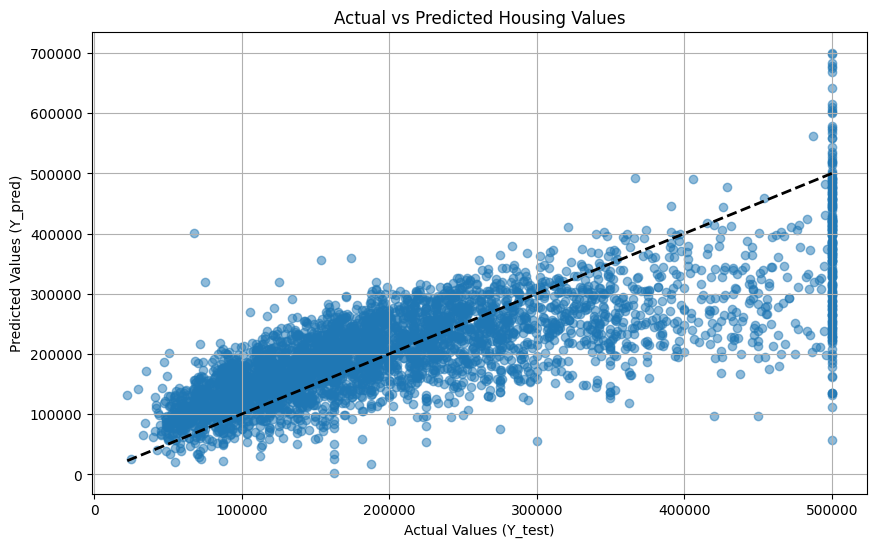

In [922]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.title('Actual vs Predicted Housing Values')
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred)')
plt.grid(True)

# Add line for perfect accuracy (Y_pred = Y_test)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)

plt.show()

# Refine the Model/Data

---



High correlation between features (**multicollinearity**) can sometimes cause issues. One way to check for features that might be good candidates for dropping or transformation is to look at the correlation matrix.
For linear regression, multicollinearity can make coefficients unstable, but doesn't necessarily decrease overall prediction accuracy unless the highly correlated features don't strongly predict the target.

Correlation with median_house_value:
median_house_value         1.000000
median_income              0.688355
ocean_proximity_encoded    0.402780
total_rooms                0.133294
housing_median_age         0.106432
households                 0.064894
total_bedrooms             0.049686
population                -0.025300
Name: median_house_value, dtype: float64


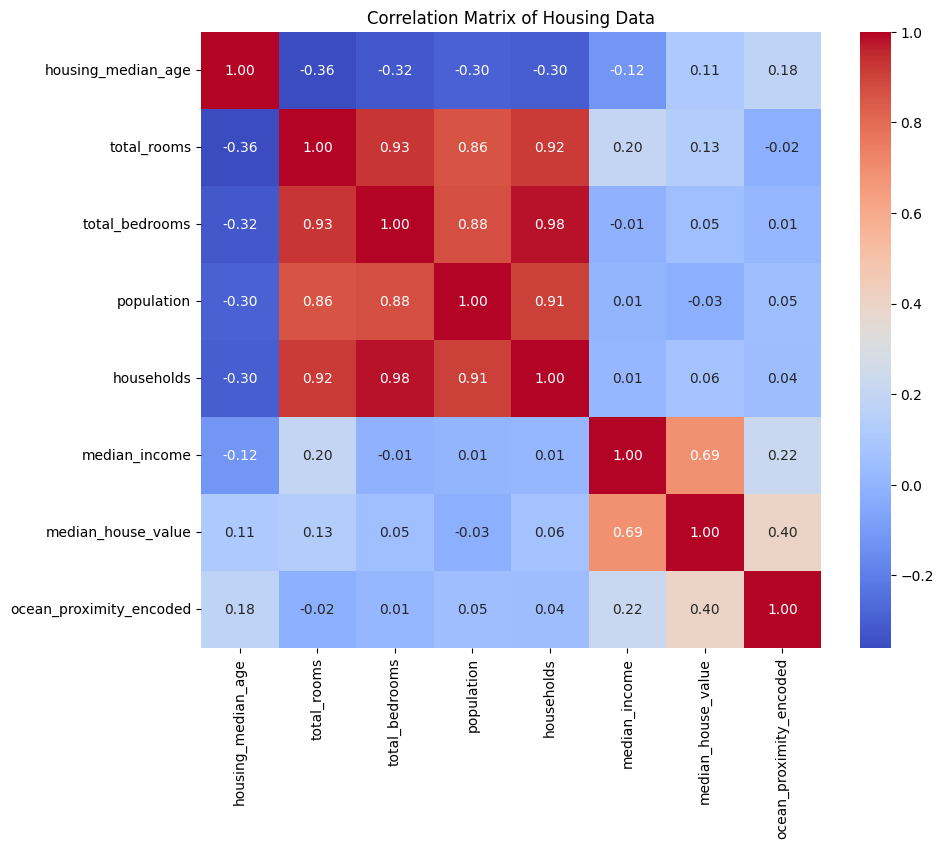

In [923]:
# Calculate the correlation matrix
correlation_matrix = HouseData.corr()

# Display correlations with the target variable 'median_house_value'
# We sort to easily see which features have the strongest/weakest linear relationship
print("Correlation with median_house_value:")
print(correlation_matrix['median_house_value'].sort_values(ascending=False))

# Display a heatmap of the correlation matrix to visualize relationships between all features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Data')
plt.show()

# Based on the correlation matrix and heatmap:
# - Features with very low absolute correlation to 'median_house_value' (close to 0)
#   might be considered for removal if they don't add predictive power.
# - Look for high correlation between predictor variables (features) themselves.

In this dataset:

*   **'total_bedrooms'**, **'population'**, **'households'** and **'total_rooms'** are highly correlated with each other.
*   **'median_income'** and **'ocean_proximity_encoded'** have the strongest correlation with the target variable.


Based purely on this analysis, you might experiment with removing features that have very low correlation with the target or high correlation with other features.

*   If a feature X is highly correlated with another feature X, remove 1 of the 2.

  *   "Which one?" Whichever is less correlated to the target Y (median_house_value).
  *   If **bedroom** and house value correlation is 0.05, \
  and **population** and house value correlation is -0.03, \
  remove **population** feature.


*   If a feature X is highly correlated with the target Y (median_house_value), keep that feature.



In [924]:
# For X, drop some columns for accuracy (trial and error)
X.drop('population', axis=1, inplace=True) # Negative correlation = population data is COMPLETELY irrelevant
X.drop('total_bedrooms', axis=1, inplace=True)
# X.drop('households', axis=1, inplace=True)
X.drop('total_rooms', axis=1, inplace=True)
# X.drop('housing_median_age', axis=1, inplace=True)


X.head()

,housing_median_age,households,median_income,ocean_proximity_encoded
0,41.0,126.0,8.3252,4
1,21.0,1138.0,8.3014,4
2,52.0,177.0,7.2574,4
3,52.0,219.0,5.6431,4
4,52.0,259.0,3.8462,4


In [925]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [926]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((16346, 4), (16346,), (4087, 4), (4087,))

In [927]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [928]:
model_new = linear_model.LinearRegression(positive=True)

In [929]:
model_new.fit(X_train_scaled, Y_train)

LinearRegression(positive=True)

In [930]:
Y_pred_new = model_new.predict(X_test_scaled)

In [931]:
print('Coefficients:', model_new.coef_)
print('Intercept:', model_new.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_new))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_new))

Coefficients: [20020.88496998 11199.82846149 76603.66431959 25134.6882132 ]
Intercept: 206983.25308944087
Mean squared error (MSE): 5896915960.23
Coefficient of determination (R^2): 0.55


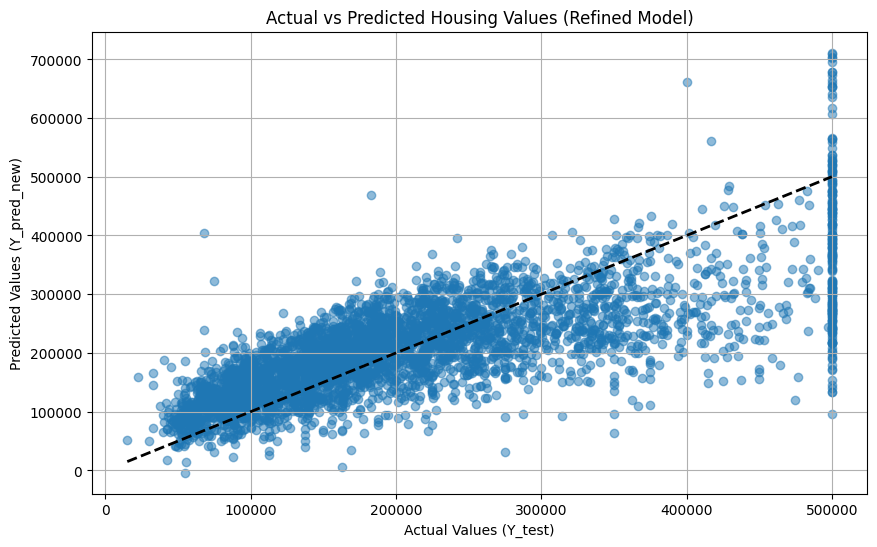

In [932]:
# Create scatterplot to show model accuracy without X-axis limit
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_new, alpha=0.5)
plt.title('Actual vs Predicted Housing Values (Refined Model)')
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred_new)')
plt.grid(True)

# Add line for perfect accuracy (Y_pred = Y_test)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)

plt.show()